In [8]:
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
loan = pd.read_csv("loan.csv")
loan.shape

(5000, 14)

In [11]:
loan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [12]:
loan = loan.drop('ID', axis=1)
loan = loan.drop('ZIP Code', axis=1)

In [13]:
loan['Education'] = loan['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'})
loan = pd.get_dummies(loan, columns=['Education'])

In [14]:
loan.head(5)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [15]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [16]:
# from the above we can conclude that
# There is some incorrect values in Experience column as min value for this column shows -3
# The "Mortgage" column is heavily skewed.

In [17]:
# Treating the experience column.
loan.Experience[loan.Experience < 0] = abs(loan.Experience)

C:\Users\Miki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


C:\Users\Miki\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Miki\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


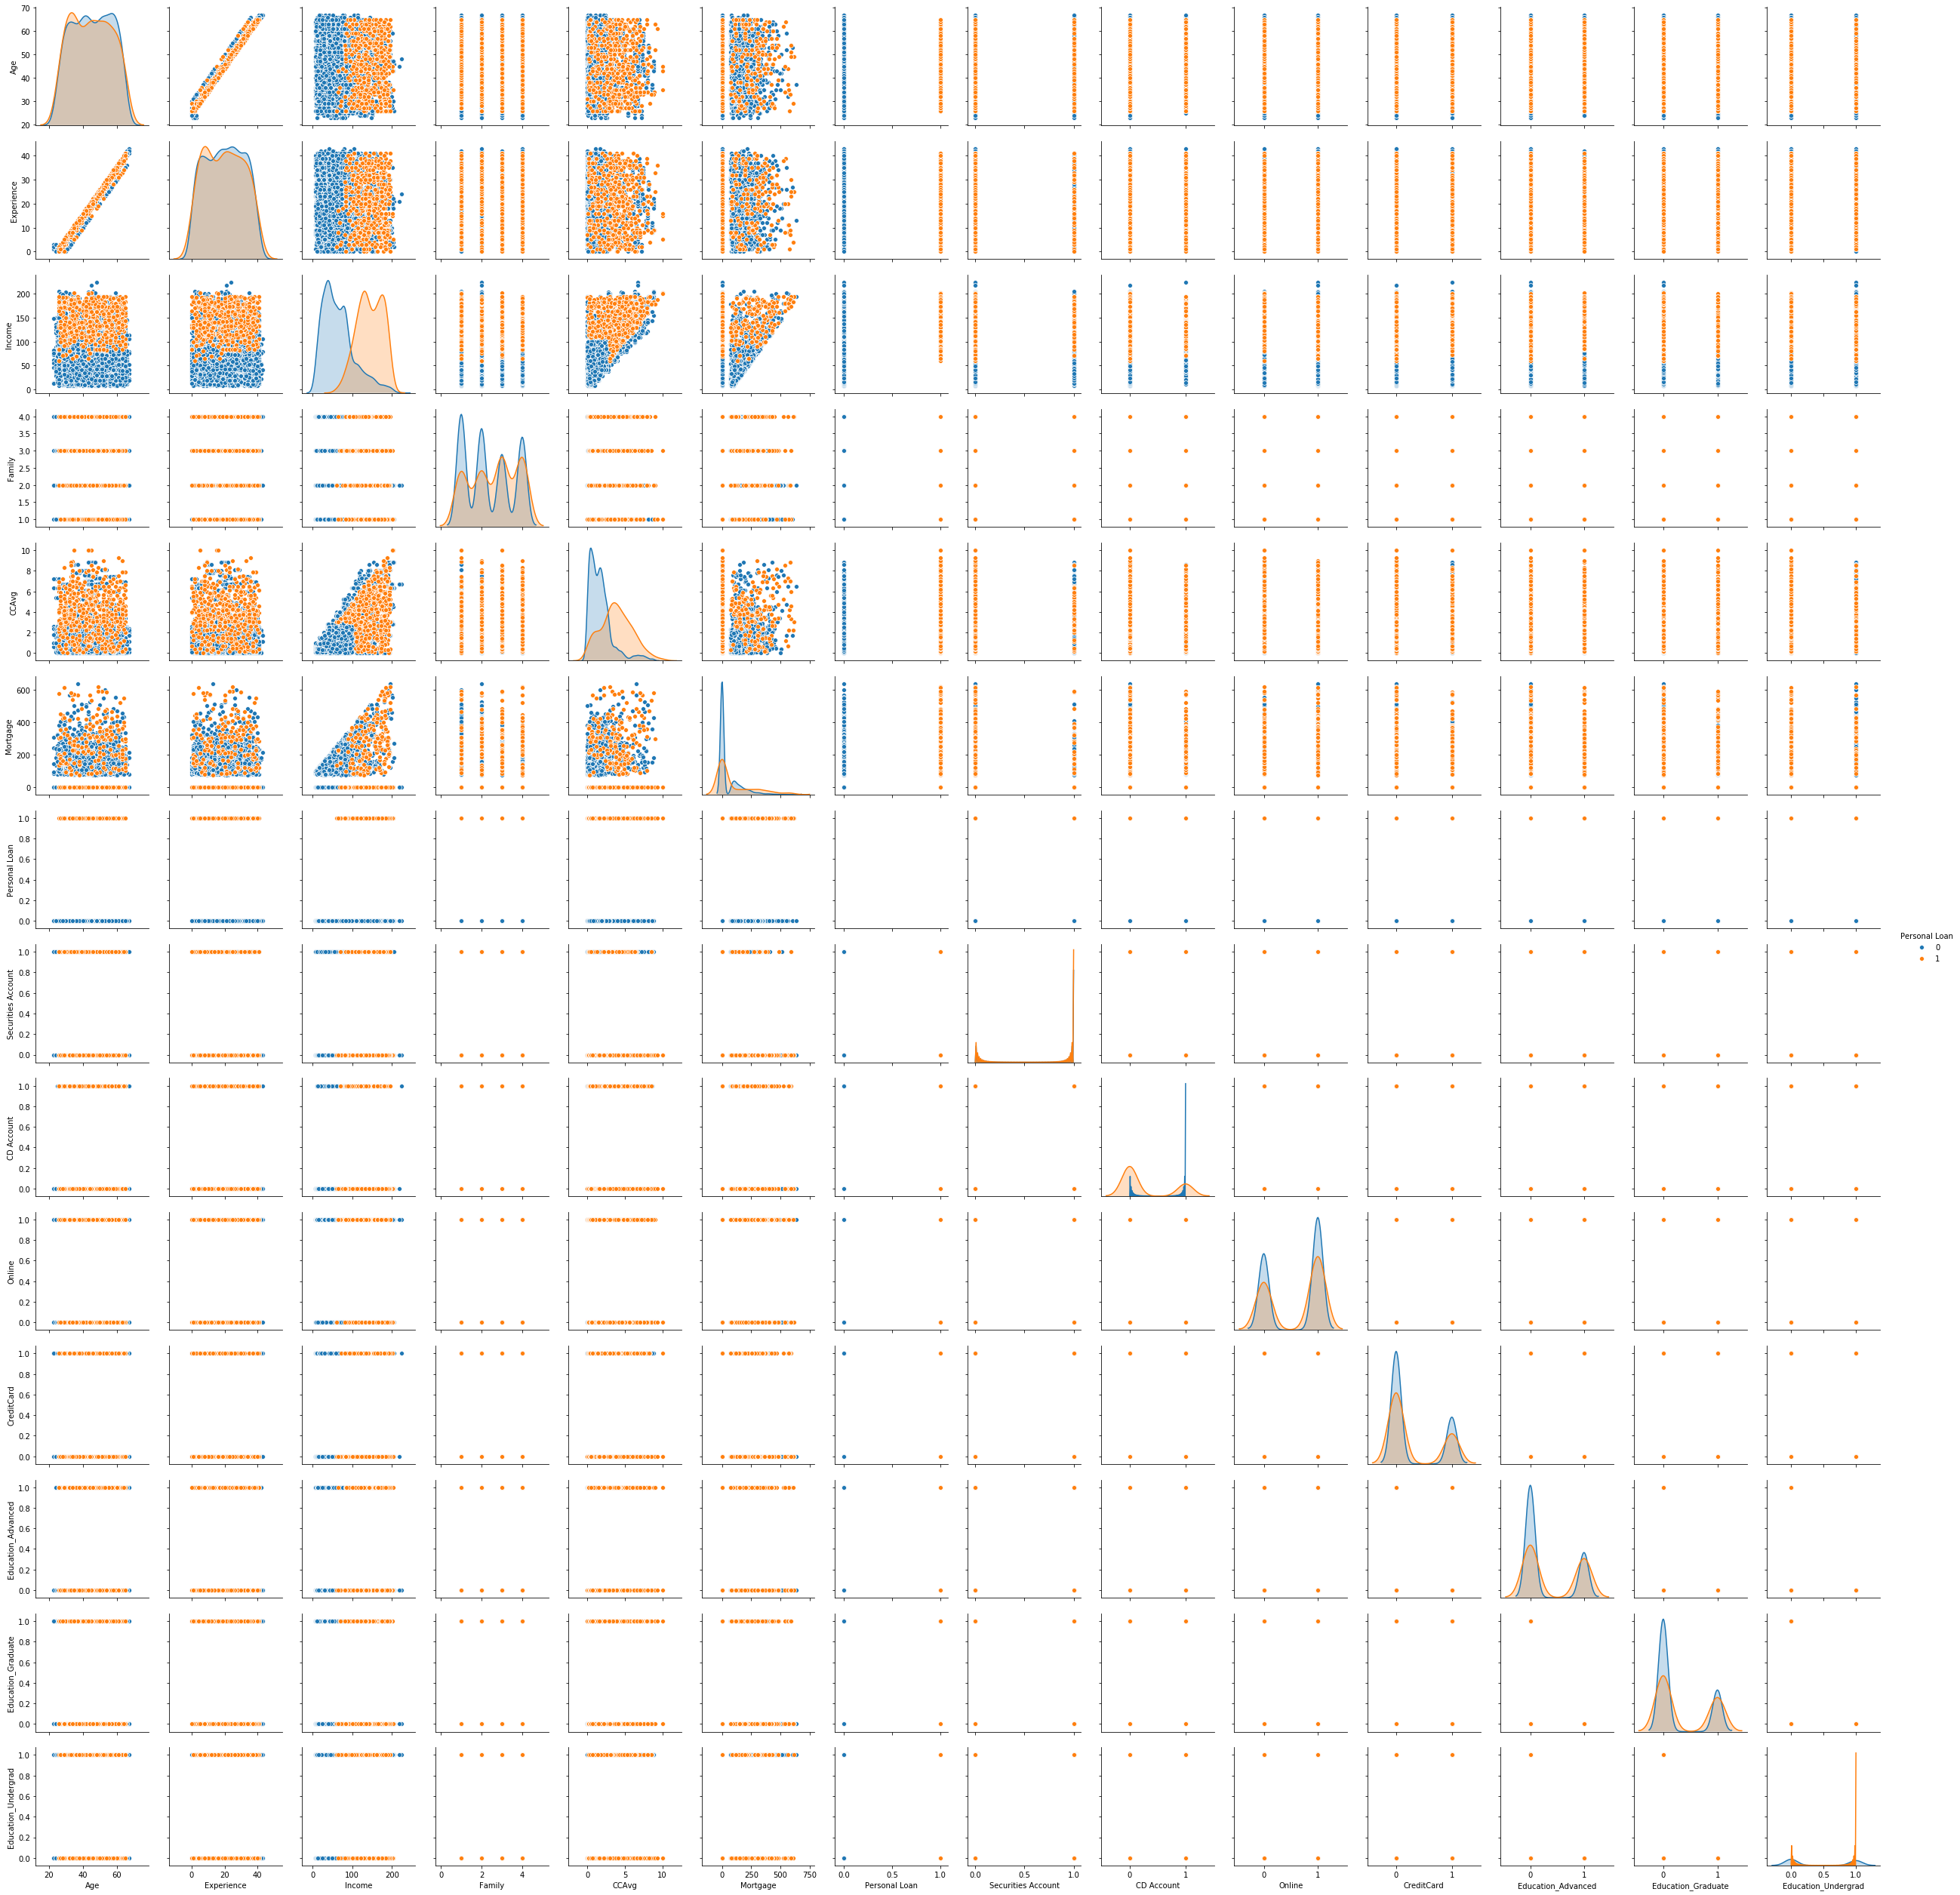

In [19]:
sns.pairplot(loan , hue='Personal Loan' , diag_kind = 'kde')

In [20]:
loan.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.045838,-0.016264,-0.027770
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851,0.021637,-0.018129,-0.003591
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.108878,-0.128364,0.218019
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.008744,0.139201,-0.118628
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.080413,-0.090366,0.156979
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.014942,-0.031806,0.042841
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.090212,0.071491,-0.148894
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.012421,0.005134,0.006863
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.009780,0.006089,-0.014630
Online,0.013702,0.014051,0.014206,0.010354,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,-0.023837,0.020590,0.003394


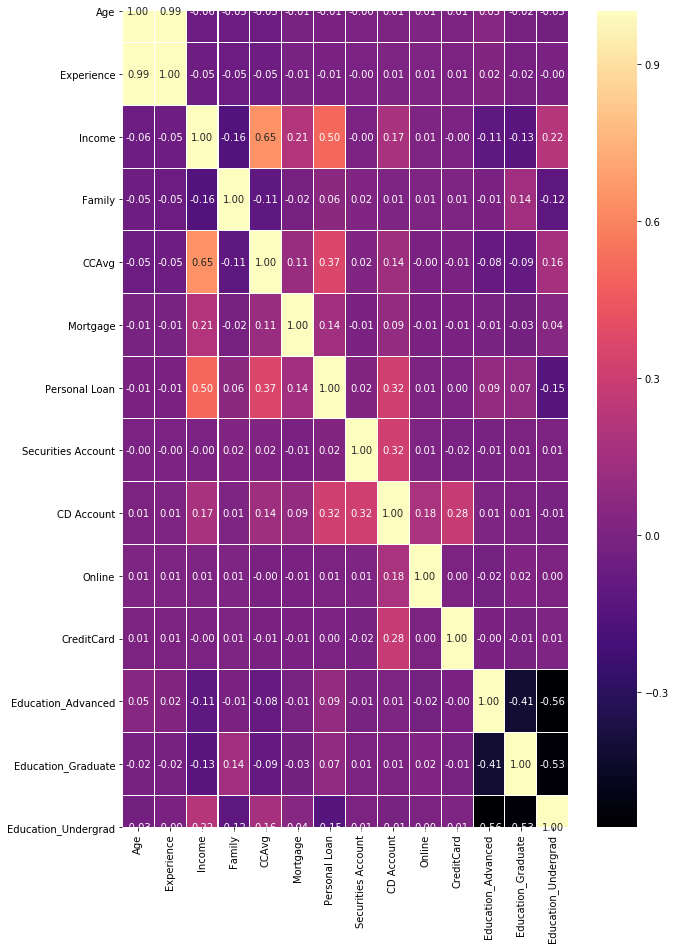

In [21]:
fig,ax = plt.subplots(figsize=(10, 15))   
sns.heatmap(loan.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [22]:
# From the above it is concluded that :-
#Age and Exp seem to have a strong correlation so we can drop one of them
#The only variables which seem to have a correlation with Personal loan are Income, CC Avg and CD account

In [23]:
# Target column is Personal Loan. To show its distribution.

In [24]:
loan.groupby(["Personal Loan"]).count()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [25]:
#From above it is concluded that :-
# Most people don't take Personaal Loan.  

In [98]:
array = loan.values
X = array[:,[1,2,3,4,5,7,8,9,11,12,13]] 
Y = array[:,6]   
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
X_test.shape

(1500, 11)

In [99]:
#Logistic Regression

In [100]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.96
[[1351   11]
 [  49   89]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1362
         1.0       0.89      0.64      0.75       138

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.86      1500
weighted avg       0.96      0.96      0.96      1500



C:\Users\Miki\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
#converting to z score to do KNN analysis. Since the variables might be in different scale, Z transformation is done.

In [102]:
from scipy.stats import zscore
t2_z=loan.apply(zscore)
corr_z=t2_z.corr()
corr_z.style.background_gradient()


,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
Age,1,0.993991,-0.0552686,-0.0464177,-0.0520122,-0.0125386,-0.00772562,-0.000436242,0.00804255,0.0137024,0.00768104,0.045838,-0.0162638,-0.0277698
Experience,0.993991,1,-0.0468755,-0.0518512,-0.0497377,-0.0110968,-0.00830387,-0.000989131,0.0097348,0.0140507,0.00885121,0.0216365,-0.0181288,-0.00359096
Income,-0.0552686,-0.0468755,1,-0.157501,0.645984,0.206806,0.502462,-0.0026165,0.169738,0.0142059,-0.00238501,-0.108878,-0.128364,0.218019
Family,-0.0464177,-0.0518512,-0.157501,1,-0.109275,-0.0204449,0.061367,0.0199941,0.0141104,0.010354,0.0115881,-0.00874433,0.139201,-0.118628
CCAvg,-0.0520122,-0.0497377,0.645984,-0.109275,1,0.109905,0.366889,0.0150863,0.136534,-0.00361101,-0.00668949,-0.0804132,-0.0903663,0.156979
Mortgage,-0.0125386,-0.0110968,0.206806,-0.0204449,0.109905,1,0.142095,-0.00541097,0.0893111,-0.0059949,-0.00723092,-0.0149423,-0.031806,0.0428409
Personal Loan,-0.00772562,-0.00830387,0.502462,0.061367,0.366889,0.142095,1,0.0219539,0.316355,0.00627782,0.00280151,0.0902119,0.0714912,-0.148894
Securities Account,-0.000436242,-0.000989131,-0.0026165,0.0199941,0.0150863,-0.00541097,0.0219539,1,0.317034,0.0126275,-0.0150283,-0.0124214,0.00513422,0.00686321
CD Account,0.00804255,0.0097348,0.169738,0.0141104,0.136534,0.0893111,0.316355,0.317034,1,0.17588,0.278644,0.0097804,0.00608932,-0.0146296
Online,0.0137024,0.0140507,0.0142059,0.010354,-0.00361101,-0.0059949,0.00627782,0.0126275,0.17588,1,0.00420966,-0.0238367,0.0205898,0.00339373


In [103]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3)

In [104]:
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [105]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_train, Y_train)

0.9137142857142857

In [106]:
NNH.score(X_test, Y_test)

0.882

In [107]:
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1362
         1.0       0.11      0.03      0.05       138

    accuracy                           0.89      1500
   macro avg       0.51      0.50      0.49      1500
weighted avg       0.84      0.89      0.86      1500



In [108]:
#Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
model.score(X_train, Y_train)

0.8502857142857143

In [111]:
model1.score(X_test , Y_test)

0.896

In [112]:
test_pred1 = model.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(Y_test, test_pred1), index=['true:yes', 'true:no'], columns=['pred:yes', 'pred:no']))
print(metrics.classification_report(Y_test, test_pred1))

          pred:yes  pred:no
true:yes      1262       89
true:no        138       11
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1351
           1       0.11      0.07      0.09       149

    accuracy                           0.85      1500
   macro avg       0.51      0.50      0.50      1500
weighted avg       0.82      0.85      0.84      1500



In [ ]:
#Which model is better, Why?
Logistics is better than KNN and Naive Bayes becaue it gives a high precision score